# Blockage flow analysis

In [26]:
from datetime import timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
import numpy as np
from pathlib import Path
from scipy import interpolate

from urbansurge.swmm_model import SWMM, weir_fault

# Autoreload.
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
fig_savefp = Path(r'C:\Users\ay434\Box\Research\Dissertation\Figures')

In [126]:
# Path to configuration file.
config_path = r"C:\Users\ay434\Documents\urbansurge\analysis\gravity_pressure_transition\blockage_flow_config.yml"

# Create instance of SWMM model.
swmm = SWMM(config_path)

# Configure model.
swmm.configure_model()

# Discretize links.
link_segs = {1: 20, 2: 2, 4: 20}
for link, n_seg in link_segs.items():
    swmm.discretize_link(link, n_seg)

# Run model.
swmm.run_simulation()

Simulation info
Flow Units: CMS
System Units: SI
Start Time: 2025-03-26 00:00:00
Start Time: 2025-03-26 06:00:00
Removed Line: 1                1                4                100        .02        0          0          0          0         

Removed Line: 1                CIRCULAR     .5               0          0          0          1                    

Removed Line: 2                4                2                10         .02        0          0          0          0         

Removed Line: 2                CIRCULAR     .5               0          0          0          1                    

Removed Line: 4                3                5                100        .02        0          0          0          0         

Removed Line: 4                CIRCULAR     .5               0          0          0          1                    

INP PATH: C:\Users\ay434\Documents\urbansurge\analysis\gravity_pressure_transition\blockage_flow_tmp.inp
2025-03-26 00:00:00 , 0
2025-03-26 

In [127]:
# Extract depths.
depths_fault = swmm.get_node_depth()
flows_fault = swmm.get_node_total_inflow()

No section found with name STORAGE.
Model has no storage components.
No section found with name STORAGE.
Model has no storage components.


In [128]:
nodes = swmm.get_component_names('JUNCTIONS')

node_distance_fault = {
    node: swmm.upstream_distance(5, 'Outfall', node, 'Junction') for node in nodes
}
node_distance_fault['5'] = 0.0

No section found with name STORAGE.
No section found with name STORAGE.
No section found with name STORAGE.
No section found with name STORAGE.
No section found with name STORAGE.
No section found with name STORAGE.
No section found with name STORAGE.
No section found with name STORAGE.
No section found with name STORAGE.
No section found with name STORAGE.
No section found with name STORAGE.
No section found with name STORAGE.
No section found with name STORAGE.
No section found with name STORAGE.
No section found with name STORAGE.
No section found with name STORAGE.
No section found with name STORAGE.
No section found with name STORAGE.
No section found with name STORAGE.
No section found with name STORAGE.
No section found with name STORAGE.
No section found with name STORAGE.
No section found with name STORAGE.
No section found with name STORAGE.
No section found with name STORAGE.
No section found with name STORAGE.
No section found with name STORAGE.
No section found with name S

## Fault free system

In [129]:
# Path to configuration file.
config_path = r"C:\Users\ay434\Documents\urbansurge\analysis\gravity_pressure_transition\blockage_flow_no_fault_config.yml"

# Create instance of SWMM model.
swmm = SWMM(config_path)

# Configure model.
swmm.configure_model()

# Discretize links.
link_segs = {1: 20, 2: 2, 3: 20}
for link, n_seg in link_segs.items():
    swmm.discretize_link(link, n_seg)

# Run model.
swmm.run_simulation()

# Extract depths.
depths_no_fault = swmm.get_node_depth()
flows_no_fault = swmm.get_node_total_inflow()

Simulation info
Flow Units: CMS
System Units: SI
Start Time: 2025-03-26 00:00:00
Start Time: 2025-03-26 06:00:00
Removed Line: 1                1                4                100        .02        0          0          0          0         

Removed Line: 1                CIRCULAR     .5               0          0          0          1                    

Removed Line: 2                4                2                10         .02        0          0          0          0         

Removed Line: 2                CIRCULAR     .5               0          0          0          1                    

Removed Line: 3                2                5                100        .02        0          0          0          0         

Removed Line: 3                CIRCULAR     .5               0          0          0          1                    

INP PATH: C:\Users\ay434\Documents\urbansurge\analysis\gravity_pressure_transition\blockage_flow_no_fault_tmp.inp
2025-03-26 00:00:00 , 0
20

## Upstream distance to each node from the outfall

In [130]:
nodes = swmm.get_component_names('JUNCTIONS')

node_distance_no_fault = {
    node: swmm.upstream_distance(5, 'Outfall', node, 'Junction') for node in nodes
}
node_distance_no_fault['5'] = 0.0

No section found with name STORAGE.
No section found with name WEIRS.
No section found with name STORAGE.
No section found with name WEIRS.
No section found with name STORAGE.
No section found with name WEIRS.
No section found with name STORAGE.
No section found with name WEIRS.
No section found with name STORAGE.
No section found with name WEIRS.
No section found with name STORAGE.
No section found with name WEIRS.
No section found with name STORAGE.
No section found with name WEIRS.
No section found with name STORAGE.
No section found with name WEIRS.
No section found with name STORAGE.
No section found with name WEIRS.
No section found with name STORAGE.
No section found with name WEIRS.
No section found with name STORAGE.
No section found with name WEIRS.
No section found with name STORAGE.
No section found with name WEIRS.
No section found with name STORAGE.
No section found with name WEIRS.
No section found with name STORAGE.
No section found with name WEIRS.
No section found wit

## Upstream distance to each link from the outfall

In [174]:
links = swmm.get_component_names('CONDUITS')

link_distance_no_fault = {
    link: swmm.upstream_distance(5, 'Outfall', link, 'Junction') for link in links
}

No section found with name STORAGE.
No section found with name WEIRS.
25 Junction
2 Junction
26 Junction
27 Junction
28 Junction
29 Junction
30 Junction
31 Junction
32 Junction
33 Junction
34 Junction
35 Junction
36 Junction
37 Junction
38 Junction
39 Junction
40 Junction
41 Junction
42 Junction
43 Junction
44 Junction
5 Outfall
No section found with name STORAGE.
No section found with name WEIRS.


IndexError: single positional indexer is out-of-bounds

## Plotting

In [132]:
# Inflow.
total_inflow_df = swmm.get_node_total_inflow()
Q_in = total_inflow_df['Total_Inflow_node_1']

No section found with name STORAGE.
Model has no storage components.


In [131]:
# Remove node 3 from node_distance_fault since it's after the weir.
node_distance_fault.pop('3')

100.0

In [163]:
x = np.arange(0, 210, 1)

# Arrays to store distances to nodes in fault and no-fault models.
dist_fault = np.zeros(len(node_distance_fault.keys()))
dist_no_fault = np.zeros(len(node_distance_no_fault.keys()))

# Number of time steps in both models.
Nt = depths_fault.shape[0]

# Array to store the raw state variable measurements.
dist_state_fault = np.zeros((Nt, len(node_distance_fault.keys())))
dist_state_no_fault = np.zeros((Nt, len(node_distance_no_fault.keys())))

# Populate state variable measurements.
for i, node in enumerate(node_distance_fault.keys()):
    dist = node_distance_fault[node]
    dist_state_fault[:,i] = depths_fault.loc[:,f'Depth_node_{node}']
    # dist_state_fault[:,i] = flows_fault.loc[:,f'Total_Inflow_node_{node}']
    dist_fault[i] = dist

for i, node in enumerate(node_distance_no_fault.keys()):
    dist = node_distance_no_fault[node]
    dist_state_no_fault[:,i] = depths_no_fault.loc[:,f'Depth_node_{node}']
    # dist_state_no_fault[:,i] = flows_no_fault.loc[:,f'Total_Inflow_node_{node}']
    dist_no_fault[i] = dist

In [164]:
def interpolate_dist(dist_state, dist, x):
    """
    Interpolates each row of dist_state from the spatial grid dist to the new grid x.
    
    Parameters:
        dist_state (ndarray): 2D array of shape (time, space)
        dist (ndarray): 1D array of spatial coordinates of shape (space,)
        x (ndarray): 1D array of new spatial coordinates
    
    Returns:
        ndarray: Interpolated 2D array of shape (time, len(x))
    """
    interp_func = lambda row: interpolate.interp1d(dist, row, kind='linear', bounds_error=False, fill_value='extrapolate')(x)
    return np.apply_along_axis(interp_func, 1, dist_state)

In [165]:
# Interpolate the state variable measurements in space to x.
dist_state_fault_interp = interpolate_dist(dist_state_fault, dist_fault, x)
dist_state_no_fault_interp = interpolate_dist(dist_state_no_fault, dist_no_fault, x)

# Subtract one from the other and get the maximum residual.
eps = np.max(np.abs(dist_state_fault_interp - dist_state_no_fault_interp), axis=0)

# Flow at 10-m upstream of outfall.
Q_10 = total_inflow_df['Total_Inflow_node_43']

# Time in minutes.
dt = total_inflow_df['datetime'].iloc[1] - total_inflow_df['datetime'].iloc[0]
t_min = (total_inflow_df['datetime'] - total_inflow_df['datetime'].iloc[0] - dt).dt.total_seconds() / 60

# Epsilon at a time.
t_slices = np.array([10, 20, 35, 50, 65])
eps_t = np.zeros((len(t_slices), len(x)))
for i in range(len(t_slices)):
    t_slice_idx = np.argmin(np.abs(t_slices[i] - t_min))
    eps_t[i,:] = np.abs(dist_state_fault_interp[t_slice_idx,:] - dist_state_no_fault_interp[t_slice_idx,:])

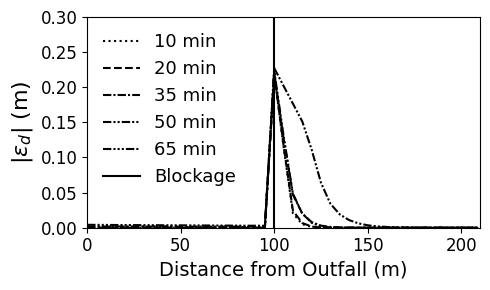

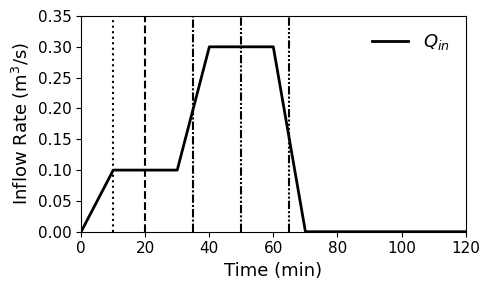

In [168]:
cmap = mpl.colormaps['tab10']
palette = [cmap(i) for i in range(5)]
markers = ['', 'o', 'v', '*', 's']
linestyles = [':', '--', (0, (4, 1, 1, 1)), (0, (4, 1, 1, 1, 1, 1)), (0, (4, 1, 1, 1, 1, 1, 1, 1))]

fig, ax = plt.subplots(figsize=(5,3))
# ax.plot(x, eps, 'k')
for i in range(len(t_slices)):
    # ax.plot(x, eps_t[i,:], c=palette[i], label=f'{t_slices[i]} min')
    # ax.plot(x, eps_t[i,:], f'k-{markers[i]}', markersize=4, label=f'{t_slices[i]} min', markevery=10)
    ax.plot(x, eps_t[i,:], c='k',linestyle=linestyles[i], label=f'{t_slices[i]} min')
ax.axvline(100, c='k', linestyle='-', label='Blockage')
ax.set_xlim(0, 210)
ax.set_ylim(0, 0.30)
# ax.set_ylim(0, 0.005)
ax.set_xlabel('Distance from Outfall (m)', fontsize=14)
ax.set_ylabel('$|\\varepsilon_d|$ (m)', fontsize=16)
# ax.set_ylabel('$|\\varepsilon_Q| \ \\rm (m^3/s)$', fontsize=16)
ax.legend(fontsize=13, frameon=False)
ax.tick_params(labelsize=12)
fig.tight_layout()
fig.savefig(fig_savefp / 'depth_residual.png', dpi=300)

# fig, ax = plt.subplots(figsize=(5,3))
# ax.plot(t_min, Q_10, 'k', label='$Q_{10m}$')
# for i, t_slice in enumerate(t_slices):
#     ax.axvline(t_slice, linestyle='--', c=palette[i])
# ax.axvline(-10, linestyle='--', c='k', label='Plotting \n Times')
# ax.set_xlabel('Time (min)', fontsize=13)
# ax.set_ylabel('Inflow Rate $\\rm (m^3/s)$', fontsize=13)
# ax.tick_params(labelsize=11)
# ax.set_xlim(0, 120)
# ax.legend(fontsize=13, frameon=False)
# # ax.set_xlim(total_inflow_df['datetime'].iloc[0] - dt, total_inflow_df['datetime'].iloc[0] + timedelta(hours=2))
# # myFmt = mdates.DateFormatter('%H:%M')
# # ax.xaxis.set_major_formatter(myFmt)
# ax.set_ylim(0, 0.25)
# fig.tight_layout()
# # fig.savefig(fig_savefp / 'blockage_Q10.png', dpi=300)

fig, ax = plt.subplots(figsize=(5,3))
ax.plot(t_min, Q_in, 'k', label='$Q_{in}$', linewidth=2)
for i, t_slice in enumerate(t_slices):
    # ax.axvline(t_slice, linestyle=linestyles[i], c=palette[i])
    ax.axvline(t_slice, linestyle=linestyles[i], c='k')
# ax.axvline(-10, linestyle='--', c='k', label='Plotting \n Times')
ax.set_xlabel('Time (min)', fontsize=13)
ax.set_ylabel('Inflow Rate $\\rm (m^3/s)$', fontsize=13)
ax.tick_params(labelsize=11)
ax.set_xlim(0, 120)
ax.legend(fontsize=13, frameon=False)
# ax.set_xlim(total_inflow_df['datetime'].iloc[0] - dt, total_inflow_df['datetime'].iloc[0] + timedelta(hours=2))
# myFmt = mdates.DateFormatter('%H:%M')
# ax.xaxis.set_major_formatter(myFmt)
ax.set_ylim(0, 0.35)

fig.tight_layout()
fig.savefig(fig_savefp / 'blockage_inflow.png', dpi=300)

(0.0, 10.0)

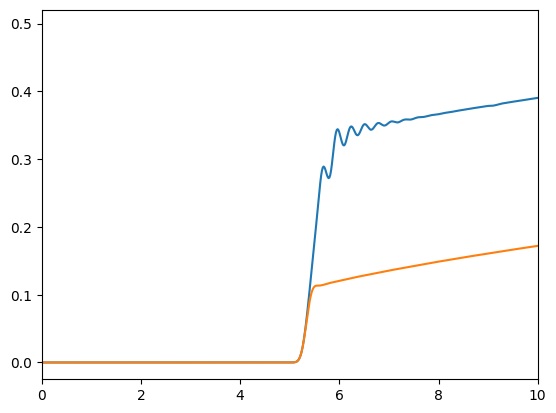

In [125]:
fig, ax = plt.subplots()
ax.plot(t_min, dist_state_fault[:,1])
ax.plot(t_min, dist_state_no_fault[:,1])
ax.set_xlim(0,10)

## Wedge storage delay

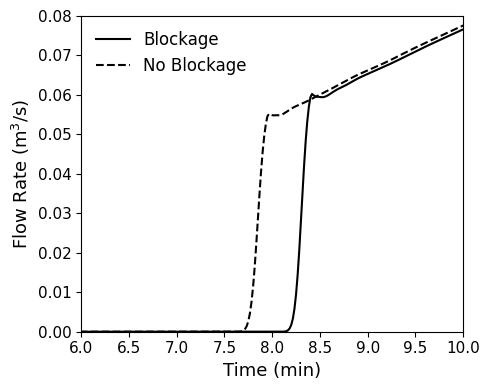

In [85]:
fig, ax = plt.subplots(figsize=(5,4))
ax.plot(t_min, dist_state_fault_interp[:,10], 'k', label='Blockage')
ax.plot(t_min, dist_state_no_fault_interp[:,10], 'k--', label='No Blockage')
ax.set_ylim(0, 0.08)
ax.set_xlim(6, 10)
ax.tick_params(labelsize=11)
ax.set_xlabel('Time (min)', fontsize=13)
ax.set_ylabel('Flow Rate ($\\rm m^3/s$)', fontsize=13)
# ax.set_ylabel('Depth (m)', fontsize=13)
ax.legend(fontsize=12, frameon=False)
fig.tight_layout()
fig.savefig(fig_savefp / 'flow_wedge_storage.png', dpi=300)

In [89]:
# Volume difference.
volume_fault = np.sum(dist_state_fault_interp[:,10])
volume_no_fault = np.sum(dist_state_no_fault_interp[:,10])
volume_diff = volume_no_fault - volume_fault
volume_diff_prc = volume_diff / volume_no_fault
print(volume_fault)
print(volume_no_fault)
print(volume_diff)
print(volume_diff_prc)

538.5512136071927
539.9598304432435
1.4086168360507827
0.0026087437557984153


## Normal depth from flow

In [217]:
Q = 0.3
D = 0.5
S = 0.02
n = 0.02
d_norm, A_norm = swmm.compute_normal_depth_area_from_flow(Q, D, S, n)
print('DNORM', d_norm)
print('ANORM', A_norm)
print('VNORM', Q / A_norm)

14.918287945610269
5.890443138456
4.889691866452456
4.000279251267367
4.06819047865528
4.026842677306618
4.051170154666765
4.036541654309189
4.045229133674119
4.040030454702985
4.0431275079749
4.041277497618679
4.042380826992576
4.041722181235914
4.042115143643916
4.041880613841541
4.042020558669886
4.0419370429300425
DNORM 0.35878954427476567
ANORM 0.15080041833243296
VNORM 1.9893844016975009


In [219]:
# Pressurized flow distance upstream.
Q1 = 0.3
v1 = 2
d1 = 0.34
g = 9.8
D = 0.5
A1 = 0.151
A2 = 0.098
Ap = np.pi / 4 * D**2
S = 0.02
f = 0.02
hLj = 0.006
Lw = (D - d1) / S
alpha = v1**2 / (2 * g * S) * (A1**2 / A2**2 - 1)
beta = f * Q1**2 / (2 * g * Ap**2 * D)
LRup = (alpha + hLj - Lw * beta) / (1 - beta)
print(LRup)

print(Lw)

14.056434989887698
7.999999999999998


In [220]:
Lp = 0.3**2 / (0.151**2 * 2 * 9.81 * 0.02)
print(Lp)

10.059111362007702


# Unused code

In [223]:
a = {'a': 1, 'b': 2, 'c': 3}
print('a' in a)
print(1 in a)

True
False


In [75]:
max_depths_fault = []
dists_fault = []
depth_fault_dist = np.zeros((len(node_distance_fault.keys()), 2))
for i, node in enumerate(node_distance_fault.keys()):
    dist = node_distance_fault[node]
    depth_fault_dist[i,0] = np.max(depths_fault.loc[:,f'Depth_node_{node}'])
    depth_fault_dist[i,1] =  dist

max_depths_no_fault = []
dists_no_fault = []
depth_no_fault_dist = np.zeros((len(node_distance_no_fault.keys()), 2))
for i, node in enumerate(node_distance_no_fault.keys()):
    dist = node_distance_no_fault[node]
    depth_no_fault_dist[i,0] = np.max(depths_no_fault.loc[:,f'Depth_node_{node}'])
    depth_no_fault_dist[i,1] =  dist

# Sort by distance column.
depth_fault_dist = depth_fault_dist[depth_fault_dist[:, 1].argsort()]
depth_no_fault_dist = depth_no_fault_dist[depth_no_fault_dist[:, 1].argsort()]

In [79]:
# Interpolate to common distance scale.
x = np.arange(0, 210, 1)

f_fault = interpolate.interp1d(depth_fault_dist[:,1], depth_fault_dist[:,0])
f_no_fault = interpolate.interp1d(depth_no_fault_dist[:,1], depth_no_fault_dist[:,0])

depth_fault_interp = f_fault(x)
depth_no_fault_interp = f_no_fault(x)

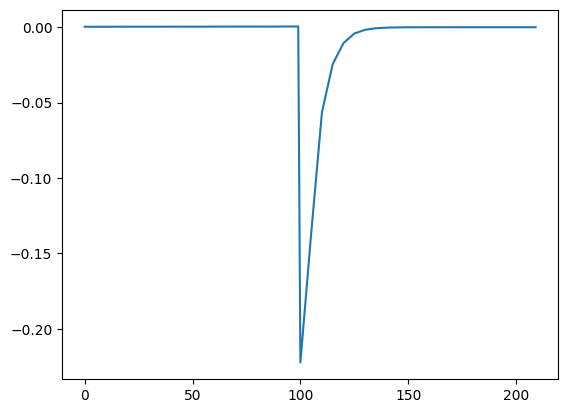

In [81]:
fig, ax = plt.subplots()
# ax.plot(depth_fault_dist[:,1], depth_fault_dist[:,0])
# ax.plot(depth_no_fault_dist[:,1], depth_no_fault_dist[:,0])
ax.plot(x, depth_no_fault_interp - depth_fault_interp)


[Text(210.0, 0, '1'),
 Text(110.0, 0, '4'),
 Text(195.0, 0, '8'),
 Text(180.0, 0, '11'),
 Text(165.0, 0, '14'),
 Text(150.0, 0, '17'),
 Text(135.0, 0, '20'),
 Text(120.0, 0, '23'),
 Text(95.0, 0, '26'),
 Text(80.0, 0, '29'),
 Text(65.0, 0, '32'),
 Text(50.0, 0, '35'),
 Text(35.0, 0, '38'),
 Text(20.0, 0, '41'),
 Text(5.0, 0, '44')]

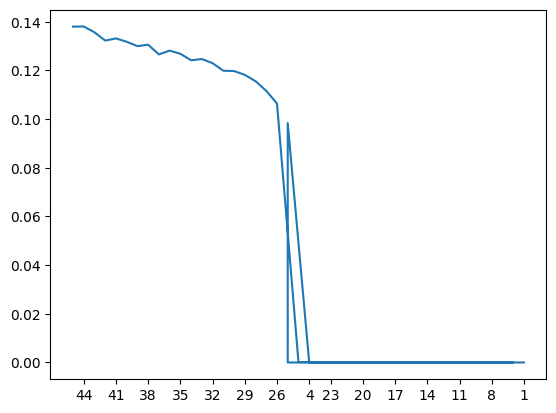

In [ ]:
depth_cols = depths_fault.columns
depth_nodes = [dcol.split('_')[-1] for dcol in depth_cols if dcol != 'datetime']

eps = np.zeros(len(depth_nodes))
dists = np.zeros(len(depth_nodes))
for i in range(len(depth_nodes)):
    node = depth_nodes[i]
    node_depth_fault = depths_fault.loc[:, f'Depth_node_{node}'].to_numpy()
    node_depth_no_fault = depths_no_fault.loc[:, f'Depth_node_{node}'].to_numpy()

    eps[i] = np.max(node_depth_no_fault - node_depth_fault)
    dists[i] = node_distance[node]

fig, ax = plt.subplots()
ax.plot(dists, eps)
ax.set_xticks(dists[::3])
ax.set_xticklabels(depth_nodes[::3])